In [2]:
# LOD, dx
import numpy as np
from numpy import fft
from scipy import signal
import os
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
os.chdir(r'C:\a_sem_i\PiPG_I\KOLOKWIUM')
np.set_printoptions(suppress = True)

# Przygotowanie danych początkowych

In [3]:
import re
def my_replace(s,character=', '):
    '''Replace all runs of whitespace with a single dash'''
    
    s = re.sub("\s+", character, s)
    return s

def readfile(input_path,output_path):
    '''reading from input_path, checking initial value_starts and writing this line to output_path '''

    with open(input_path,'r') as r, open(output_path, 'w') as w:
        for line in r:
            line = line[6:]
            wart = my_replace(line).split(',')
            k = 0
            for i in wart:
                if i.startswith(' I'):
                    i = i[2:]
                    wart[k] = ' ' + i
                k += 1
            w.writelines(wart+['\n'])

In [5]:
# readfile('finals.data.iau2000.txt', 'out_data.txt')
# lod, dx = np.loadtxt('out_data2.txt', usecols=(7,9), unpack=True)
value = np.loadtxt('8sin.txt')

In [18]:
t_start = datetime(1992,1,1)
t_stop = datetime(2021,4,2)
delta = t_stop-t_start

t = np.arange(t_start, t_stop, timedelta(days=1)).astype(datetime)
t = np.arange(1/100,(len(value)+1)/100,1/100)
len(t), len(value)

(1000, 1000)

# Wizualizacja danych początkowych

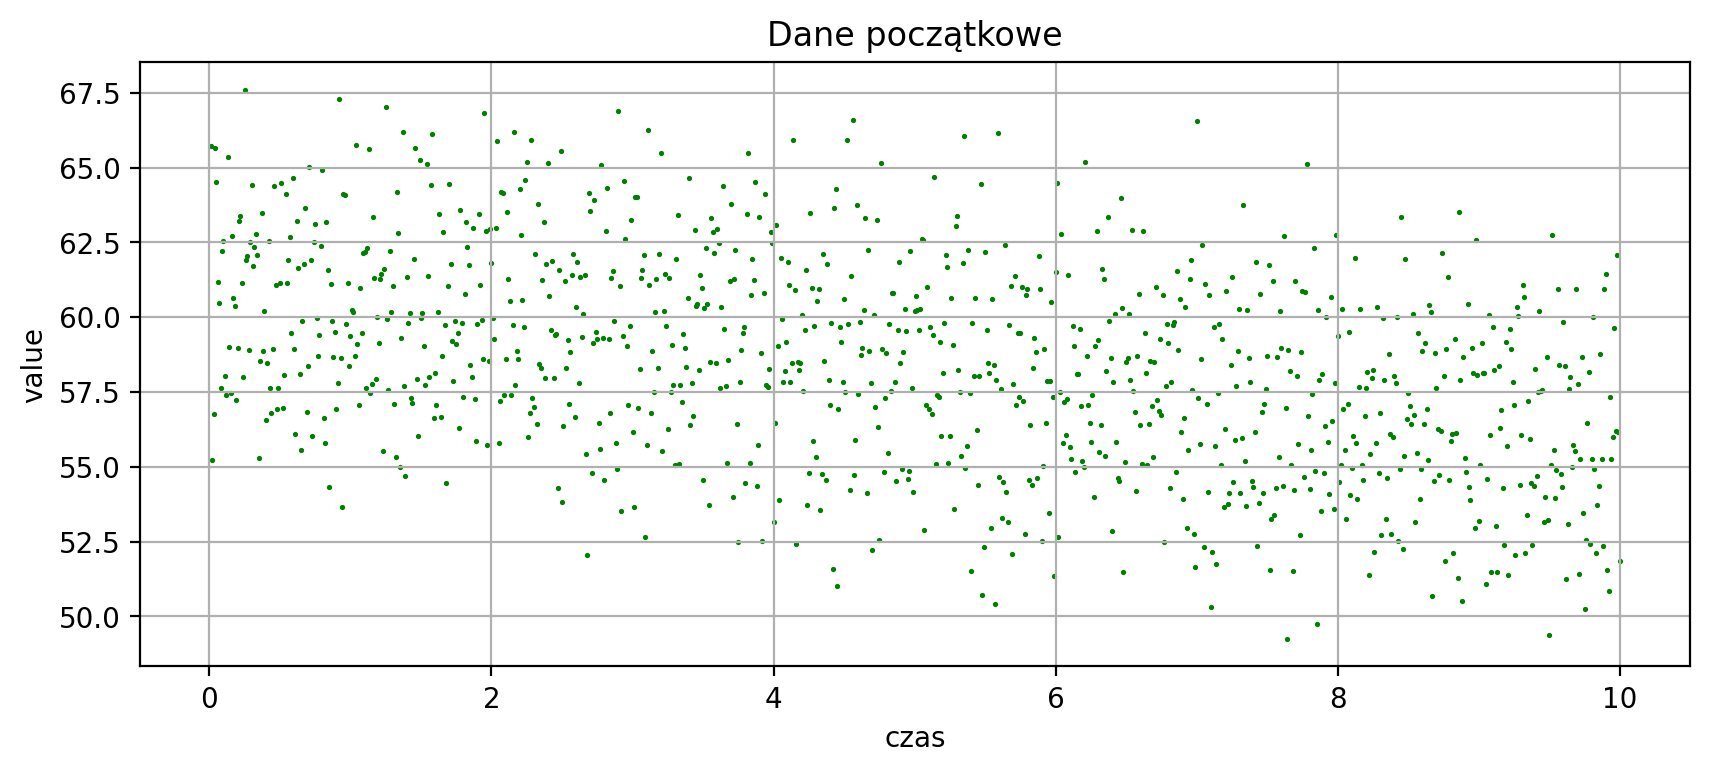

In [19]:
#wizualizacja lenght of day (LOD) [miliseconds]

plt.figure(figsize=(10,4), dpi=200)
plt.title('Dane początkowe')
plt.xlabel('czas')
plt.ylabel('value')
plt.scatter(t,value, s = 0.8, c = 'g')
plt.grid(True)
# plt.savefig('LOD1.png', dpi = 200, bbox_inches = 'tight')
plt.show()

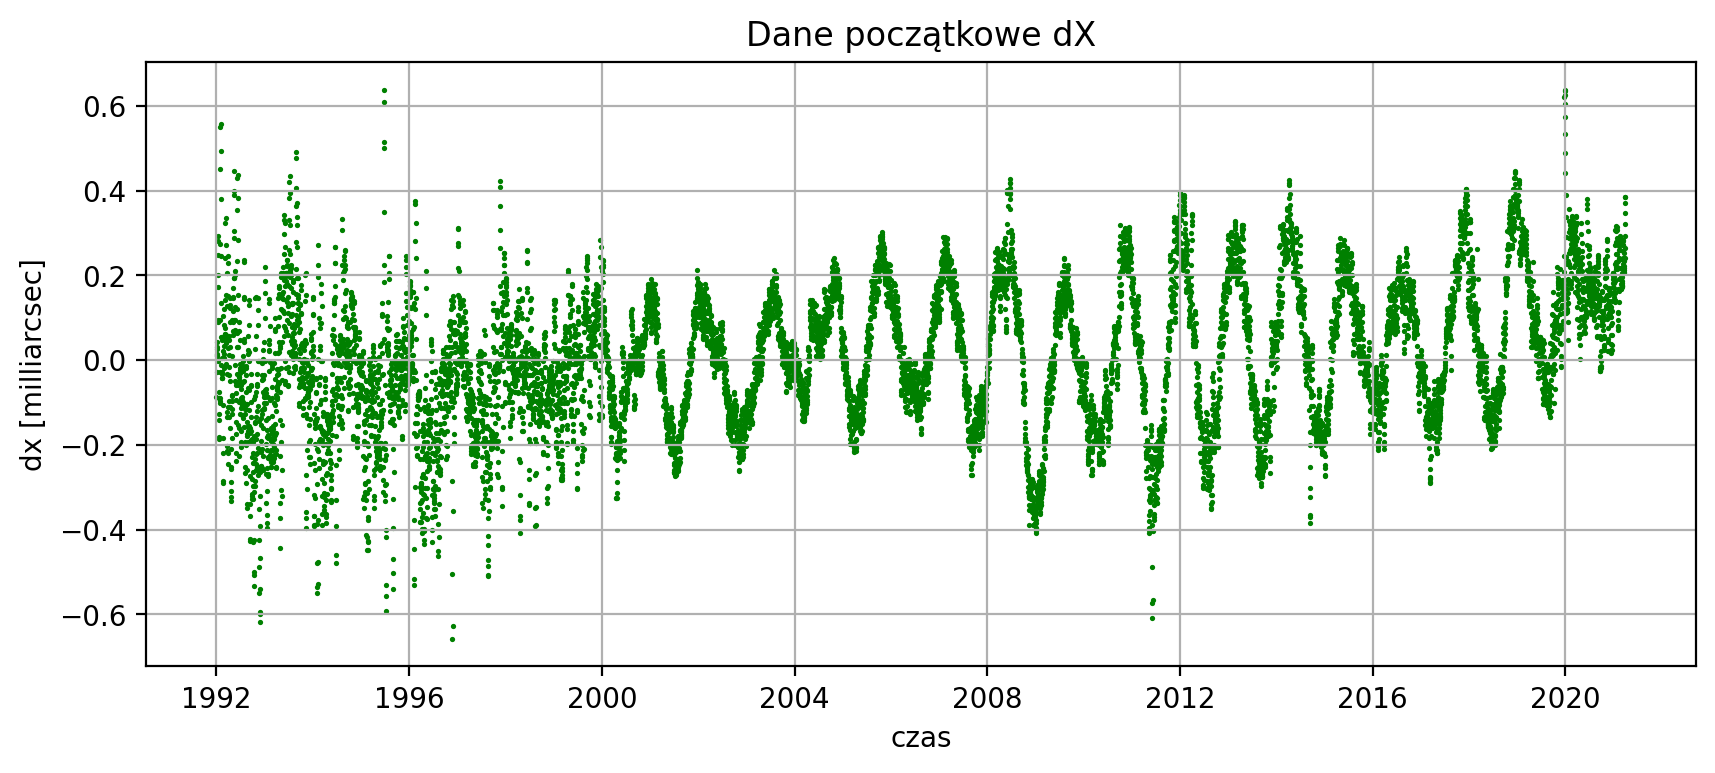

In [6]:
# wizualizacja dx [milliarcsec]

fig = plt.figure(figsize=(10,4), dpi=200)
plt.title('Dane początkowe dX')
plt.xlabel('czas')
plt.ylabel('dx [milliarcsec]')
plt.scatter(t,dx, s=0.8, c = 'g')
plt.grid(True)
plt.savefig('dx1.png', dpi = 100, bbox_inches = 'tight')
plt.show()

# Modele liniowe

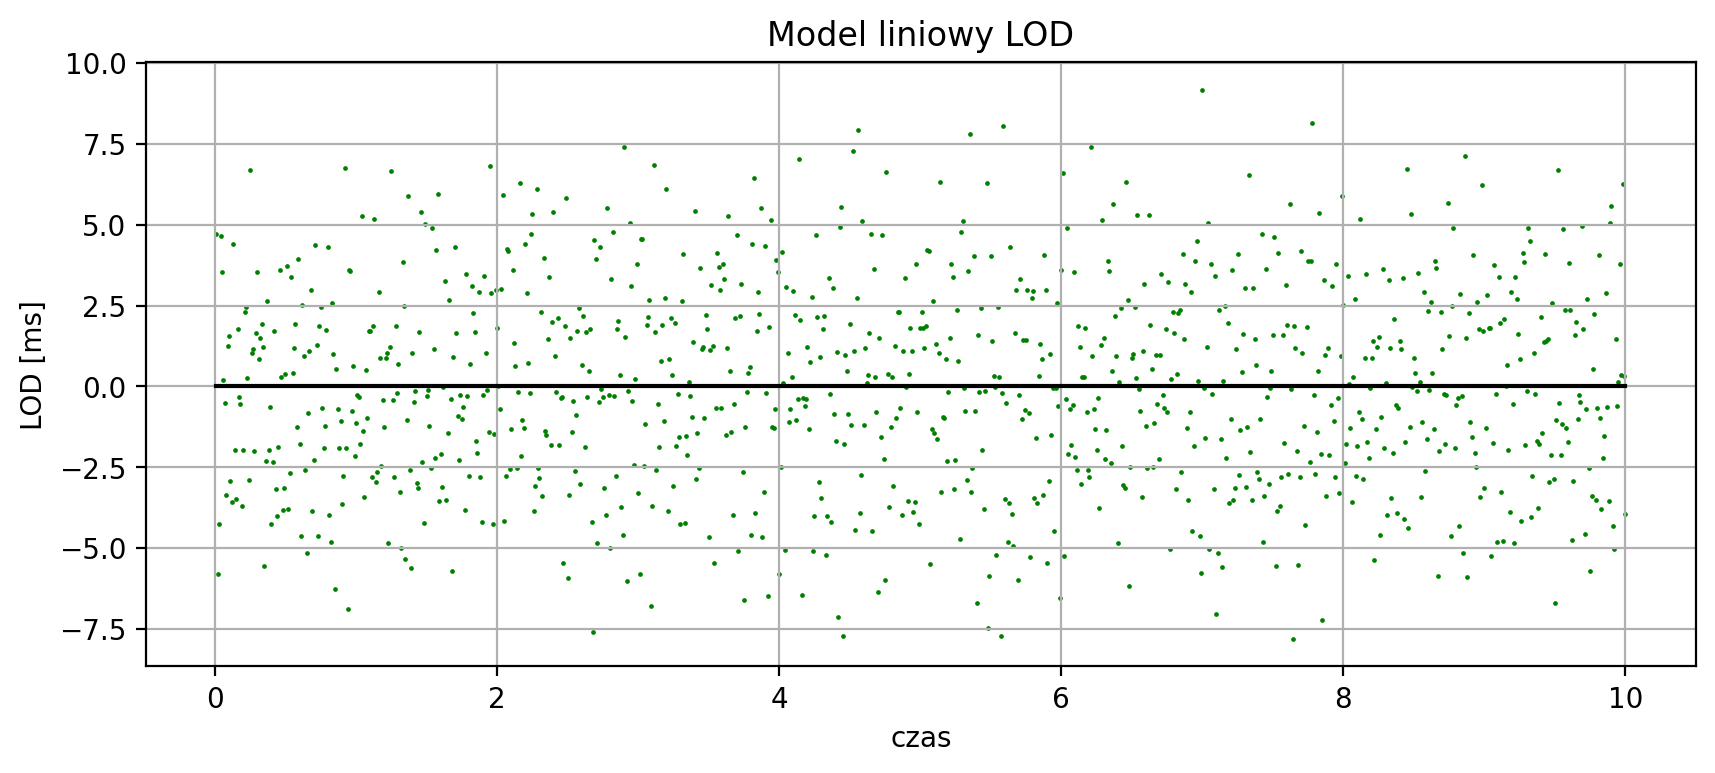

In [21]:
# LOD

model = LinearRegression()
x = np.arange(1,len(t)+1).reshape(-1, 1)
y = value

model.fit(x,y)
y_predict = model.predict(x)
value2 = (y - y_predict)

fig = plt.figure(figsize=(10,4), dpi=200)
plt.title('Model liniowy LOD')
plt.xlabel('czas')
plt.ylabel('LOD [ms]')
plt.scatter(t, value2, s = 0.5, c = 'g')
plt.plot(t, np.linspace(0,0, len(t)), '-k')
plt.grid(True)
# plt.savefig('LOD2.png', dpi = 100, bbox_inches = 'tight')
plt.show()

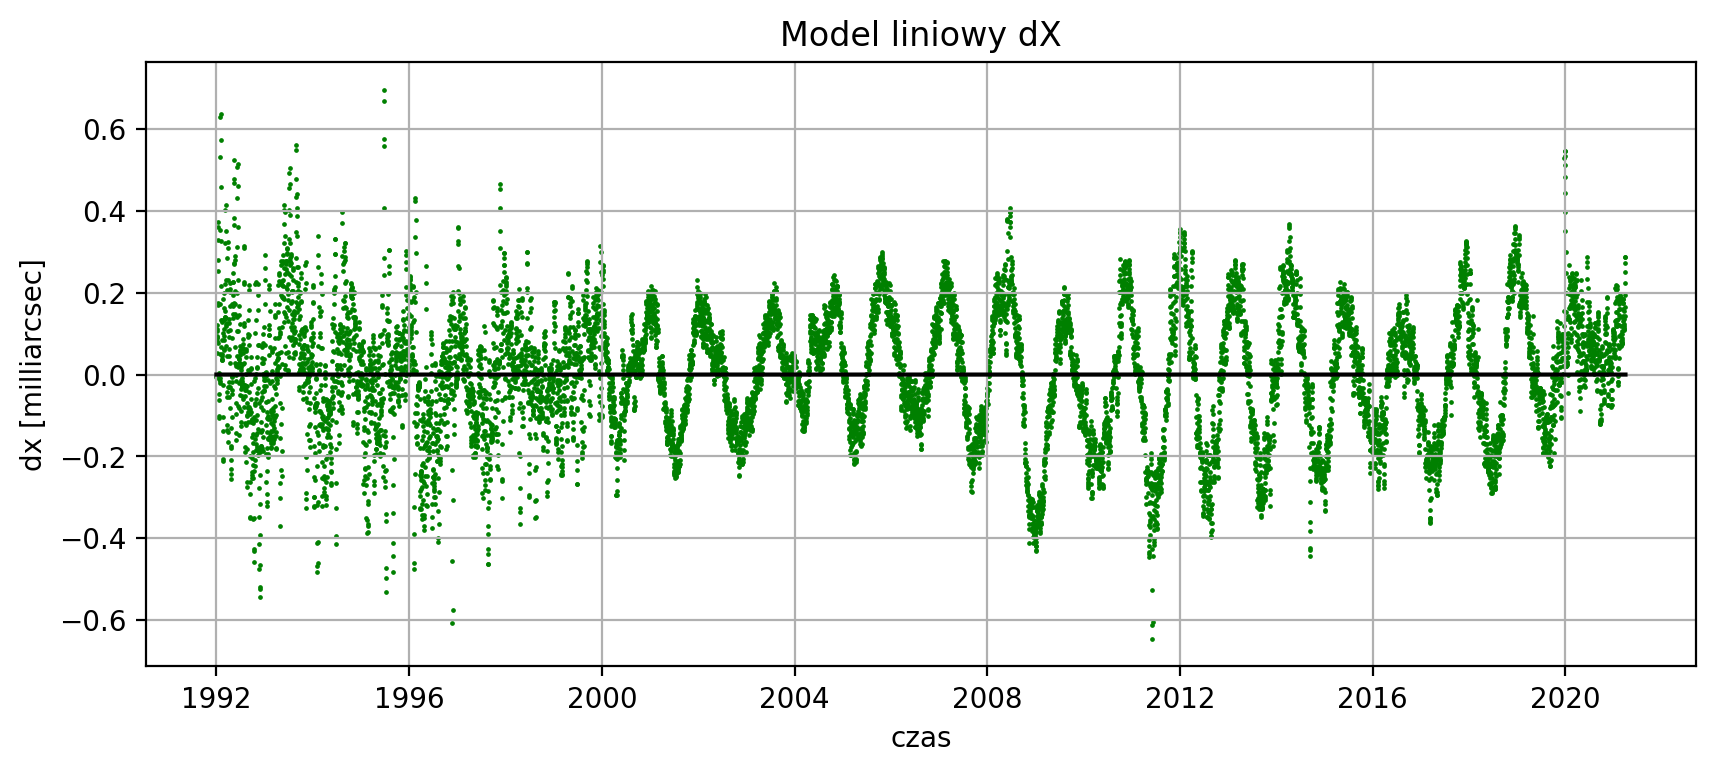

In [8]:
# dx

model2 = LinearRegression()
x = np.arange(1,len(t)+1).reshape(-1, 1)
y2 = dx

model.fit(x,y2)
y_predict2 = model.predict(x)
value2 = (y2 - y_predict2)

fig = plt.figure(figsize=(10,4), dpi=200)
plt.title('Model liniowy dX')
plt.xlabel('czas')
plt.ylabel('dx [milliarcsec]')
plt.scatter(t, value2, s = 0.5, c = 'g')
plt.plot(t, np.linspace(0,0, len(t)), '-k')
plt.grid(True)
plt.savefig('dx2.png', dpi = 200, bbox_inches = 'tight')
plt.show()

# Częstotliwości

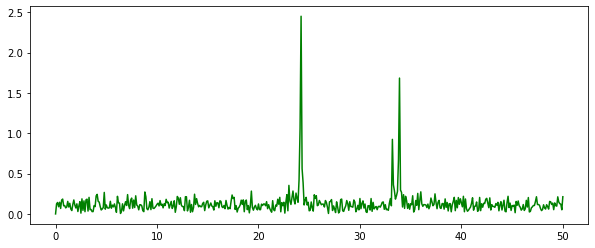

Peaks:  [24.200000000000003, 33.2, 33.9]
Value peaks:  [2.4498091479917106, 0.9239702991027944, 1.683477846853116]


Text(0.5, 0, 'częstotliwość  [1/sec]')

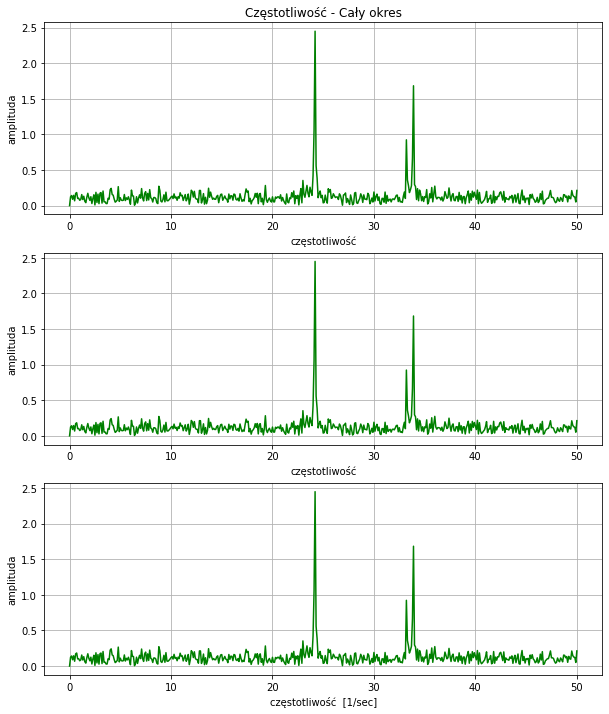

In [40]:
# LOD

samples = len(y)
dt = 1/100 # sec
f_trans = 2*abs(fft.rfft(value2)) / samples
freq = fft.rfftfreq(len(value2), dt)
plt.figure(figsize = (10,4))
plt.plot(freq, f_trans, 'g')
# plt.xlim(-1,1)
plt.show()

peaks = signal.find_peaks(f_trans,0.5)[0]
peaks = list(freq[peaks])

print('Peaks: ', peaks )
# peaks.pop(1)
value_peaks = signal.find_peaks(f_trans,0.5)[1]['peak_heights']
value_peaks = list(value_peaks)
print('Value peaks: ', value_peaks)
# value_peaks.pop(1)


fig, (ax_c, ax, ax1) = plt.subplots(3,1, figsize = (10,12))
ax_c.set_title('Częstotliwość - Cały okres')
# ax.set_title(f'Częstotliwość - okres od {datetime.date(t[0])} do {datetime.date(t[0]+ timedelta(366))}')
# ax1.set_title(f'Częstotliwość - okres od {datetime.date(t[0] + timedelta(len(t)*0.035))} do {datetime.date(t[0]+ timedelta(len(t)*0.075))}')
for a in (ax_c, ax, ax1):
    a.set_xlabel('częstotliwość')
    a.set_ylabel('amplituda')
    a.plot(freq, f_trans, 'g')
    a.grid()
ax1.set_xlabel('częstotliwość  [1/sec]')

# ax.set_xlim(-0.0001,(366/len(t)))

# for x,val in zip(peaks, value_peaks):
#     if freq[x]<0.006:
#         ax.plot([freq[x],freq[x]], [0,0.6], ':')
#         ax.text(freq[x],val+0.05,str((freq[x]).round(5)))
# ax1.set_xlim(0.035,0.075)

# for x,val in zip(peaks, value_peaks):
#     if freq[x]>0.035 and freq[x]<0.075:
#         ax1.plot([freq[x],freq[x]], [0,0.6], ':')
#         ax1.text(freq[x],val+0.05,str(freq[x].round(5)))
    
# plt.savefig('LOD3.png', dpi = 200, bbox_inches = 'tight')
# plt.show()

In [38]:
# dx

samples = len(y2)
dt = 1 # day
f_trans = 2*abs(fft.rfft(value2)) / samples
freq = fft.rfftfreq(len(value2), dt)

peaks = signal.find_peaks(f_trans,0.02)[0]
peaks = list(peaks)

value_peaks = signal.find_peaks(f_trans,0.02)[1]['peak_heights']
value_peaks = list(value_peaks)
print(peaks)
print(value_peaks)

peaks = [24,782]
value_peaks = [value_peaks[3], value_peaks[-1]]

fig, (ax_c, ax, ax1) = plt.subplots(3,1, figsize = (10,12))
ax_c.set_title('Częstotliwość dX - Cały okres')
ax.set_title(f'Częstotliwość LOD - okres od {datetime.date(t[0])} do {datetime.date(t[0]+ timedelta(366))}')
ax1.set_title(f'Częstotliwość LOD - okres od {datetime.date(t[0] + timedelta(len(t)*0.06))} do {datetime.date(t[0]+ timedelta(len(t)*0.1))}')

for a in (ax_c, ax, ax1):
    #a.set_xlabel('częstotliwość')
    a.set_ylabel('amplituda')
    a.plot(freq, f_trans, 'g')
    a.grid()
ax1.set_xlabel('częstotliwość [1/day]')

ax.set_xlim(-0.00001,(366/len(t)))

for x,val in zip(peaks, value_peaks):
    if freq[x]<0.01:
        ax.plot([freq[x],freq[x]], [0,0.2], ':')
        ax.text(freq[x],val,str(freq[x].round(5)))
ax1.set_xlim(0.06,0.1)

for x,val in zip(peaks, value_peaks):
    if freq[x]>0.07:
        ax1.plot([freq[x],freq[x]], [0,0.1], ':')
        ax1.text(freq[x],val,str(freq[x].round(5)))
    
plt.savefig('dx3.png', dpi = 200, bbox_inches = 'tight')
plt.show()

NameError: name 'y2' is not defined

In [11]:
datetime.date(t[0]+ timedelta(365))

datetime.date(1992, 12, 31)

In [12]:
t[0]+ timedelta(365)

datetime.datetime(1992, 12, 31, 0, 0)

In [13]:
timedelta(len(t)*0.35)

datetime.timedelta(days=3739, seconds=34560)